# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


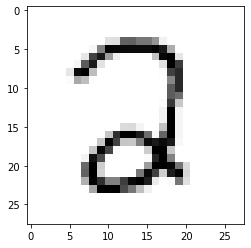

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2424
Training Accuracy: 0.6475, Testing Accuracy: 0.6411



Epoch 10, Loss 0.0922
Training Accuracy: 0.9179, Testing Accuracy: 0.9279



Epoch 20, Loss 0.056
Training Accuracy: 0.9422, Testing Accuracy: 0.9582



Epoch 30, Loss 0.0438
Training Accuracy: 0.9533, Testing Accuracy: 0.9667



Epoch 40, Loss 0.0378
Training Accuracy: 0.9573, Testing Accuracy: 0.9688



Epoch 50, Loss 0.0343
Training Accuracy: 0.9603, Testing Accuracy: 0.9693



Epoch 60, Loss 0.0318
Training Accuracy: 0.9632, Testing Accuracy: 0.9708



Epoch 70, Loss 0.0299
Training Accuracy: 0.9654, Testing Accuracy: 0.9728



Epoch 80, Loss 0.0284
Training Accuracy: 0.9674, Testing Accuracy: 0.9723



Epoch 90, Loss 0.0272
Training Accuracy: 0.9684, Testing Accuracy: 0.9723



Epoch 100, Loss 0.0261
Training Accuracy: 0.9698, Testing Accuracy: 0.9733



Epoch 110, Loss 0.0252
Training Accuracy: 0.9709, Testing Accuracy: 0.9733



Epoch 120, Loss 0.0243
Training Accuracy: 0.9724, Testing Accuracy: 0.9738



Epoch 130, Loss 0.0235
Training Accuracy: 0.9730, Testing Accuracy: 0.9733



Epoch 140, Loss 0.0228
Training Accuracy: 0.9737, Testing Accuracy: 0.9738



Epoch 150, Loss 0.0222
Training Accuracy: 0.9745, Testing Accuracy: 0.9738



Epoch 160, Loss 0.0216
Training Accuracy: 0.9752, Testing Accuracy: 0.9738



Epoch 170, Loss 0.021
Training Accuracy: 0.9759, Testing Accuracy: 0.9743



Epoch 180, Loss 0.0204
Training Accuracy: 0.9765, Testing Accuracy: 0.9738



Epoch 190, Loss 0.0199
Training Accuracy: 0.9770, Testing Accuracy: 0.9753



Epoch 200, Loss 0.0194
Training Accuracy: 0.9774, Testing Accuracy: 0.9758



Epoch 210, Loss 0.019
Training Accuracy: 0.9780, Testing Accuracy: 0.9758



Epoch 220, Loss 0.0185
Training Accuracy: 0.9787, Testing Accuracy: 0.9758



Epoch 230, Loss 0.0181
Training Accuracy: 0.9794, Testing Accuracy: 0.9763



Epoch 240, Loss 0.0177
Training Accuracy: 0.9800, Testing Accuracy: 0.9763



0.04342248288194492

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2203
Training Accuracy: 0.7788, Testing Accuracy: 0.7959



Epoch 10, Loss 0.1009
Training Accuracy: 0.9105, Testing Accuracy: 0.9219



Epoch 20, Loss 0.0786
Training Accuracy: 0.9266, Testing Accuracy: 0.9390



Epoch 30, Loss 0.0681
Training Accuracy: 0.9357, Testing Accuracy: 0.9486



Epoch 40, Loss 0.0617
Training Accuracy: 0.9404, Testing Accuracy: 0.9521



Epoch 50, Loss 0.0573
Training Accuracy: 0.9444, Testing Accuracy: 0.9541



Epoch 60, Loss 0.054
Training Accuracy: 0.9468, Testing Accuracy: 0.9567



Epoch 70, Loss 0.0515
Training Accuracy: 0.9486, Testing Accuracy: 0.9587



Epoch 80, Loss 0.0495
Training Accuracy: 0.9506, Testing Accuracy: 0.9597



Epoch 90, Loss 0.0478
Training Accuracy: 0.9519, Testing Accuracy: 0.9592



Epoch 100, Loss 0.0464
Training Accuracy: 0.9524, Testing Accuracy: 0.9592



Epoch 110, Loss 0.0451
Training Accuracy: 0.9532, Testing Accuracy: 0.9602



Epoch 120, Loss 0.0441
Training Accuracy: 0.9546, Testing Accuracy: 0.9622



Epoch 130, Loss 0.0431
Training Accuracy: 0.9556, Testing Accuracy: 0.9642



Epoch 140, Loss 0.0423
Training Accuracy: 0.9560, Testing Accuracy: 0.9642



Epoch 150, Loss 0.0415
Training Accuracy: 0.9568, Testing Accuracy: 0.9647



Epoch 160, Loss 0.0409
Training Accuracy: 0.9569, Testing Accuracy: 0.9647



Epoch 170, Loss 0.0402
Training Accuracy: 0.9571, Testing Accuracy: 0.9652



Epoch 180, Loss 0.0397
Training Accuracy: 0.9574, Testing Accuracy: 0.9652



Epoch 190, Loss 0.0392
Training Accuracy: 0.9579, Testing Accuracy: 0.9657



Epoch 200, Loss 0.0387
Training Accuracy: 0.9583, Testing Accuracy: 0.9652



Epoch 210, Loss 0.0382
Training Accuracy: 0.9589, Testing Accuracy: 0.9652



Epoch 220, Loss 0.0378
Training Accuracy: 0.9593, Testing Accuracy: 0.9647



Epoch 230, Loss 0.0374
Training Accuracy: 0.9597, Testing Accuracy: 0.9647



Epoch 240, Loss 0.0371
Training Accuracy: 0.9599, Testing Accuracy: 0.9652



0.028663396208496266

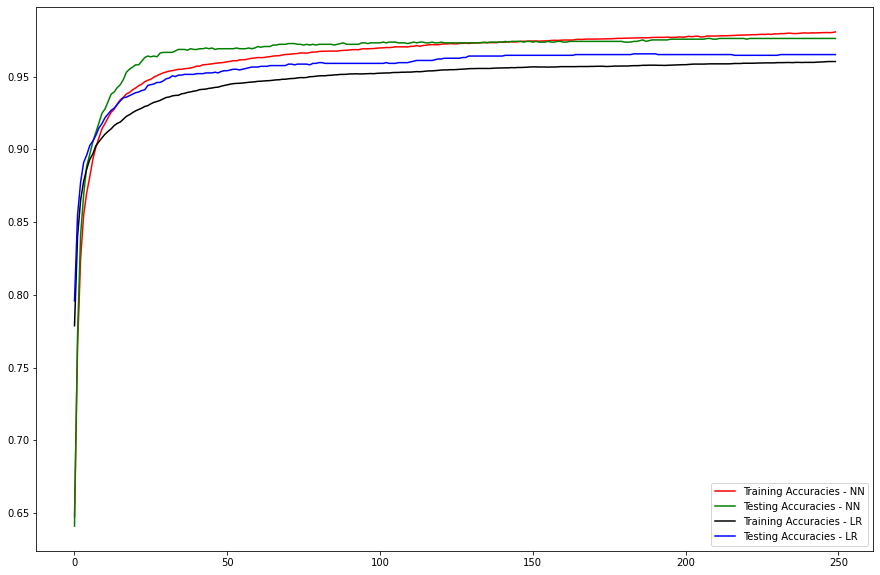

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

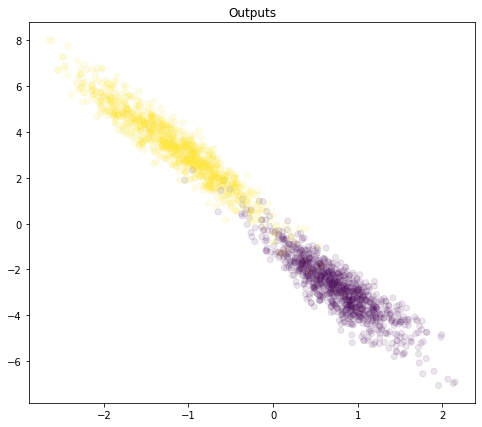

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

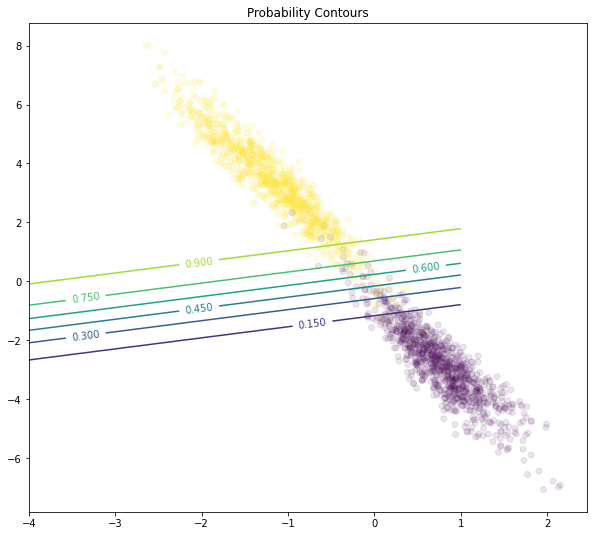

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );